In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [20]:
df = pd.read_csv('./embeddings_combined.csv')

In [21]:
# Standardize the data before Using PCA to reduce dimensions
from sklearn.preprocessing import StandardScaler

embedding_cols = [str(i) for i in range(1024)]
scaler = StandardScaler()
df[embedding_cols] = scaler.fit_transform(df[embedding_cols].values)

In [22]:
# Dimensionality Reduction using PCA
from sklearn.decomposition import PCA

PCA_reducer = PCA(n_components=512)
pca_embeddings = PCA_reducer.fit_transform(df[embedding_cols])

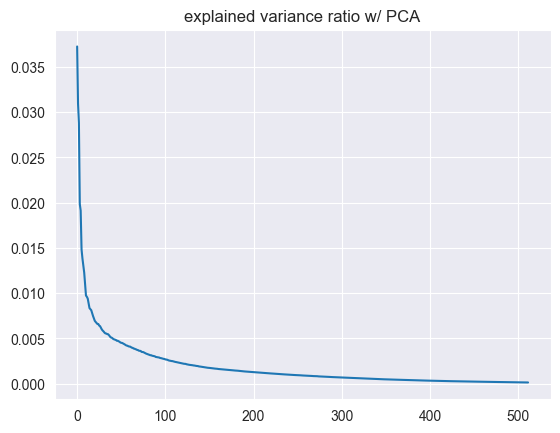

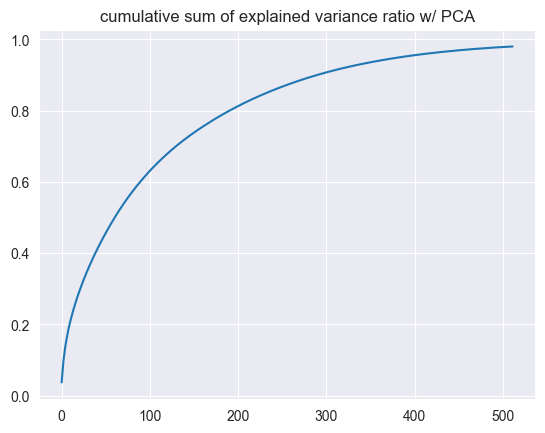

In [23]:
var_ratio = PCA_reducer.explained_variance_ratio_
plt.plot(var_ratio)
plt.title("explained variance ratio w/ PCA")
plt.show()
plt.plot(np.cumsum(var_ratio))
plt.title("cumulative sum of explained variance ratio w/ PCA")
plt.show()

In [24]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['sector_encoded'] = label_encoder.fit_transform(df['industry'])
num_classes = len(df['industry'].unique())

C:\Users\matth\AppData\Local\Temp\ipykernel_25272\2722388683.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['sector_encoded'] = label_encoder.fit_transform(df['industry'])


In [25]:
X = df[embedding_cols].values
# X = pca_embeddings
y = df['sector_encoded'].values

In [26]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print("Data split into training and test sets.")

print(len(X_test), len( X_train), len(y_test), len(y_train))



Data split into training and test sets.
7615 30457 7615 30457


In [27]:
from sklearn.svm import SVC 

In [28]:
svm = SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

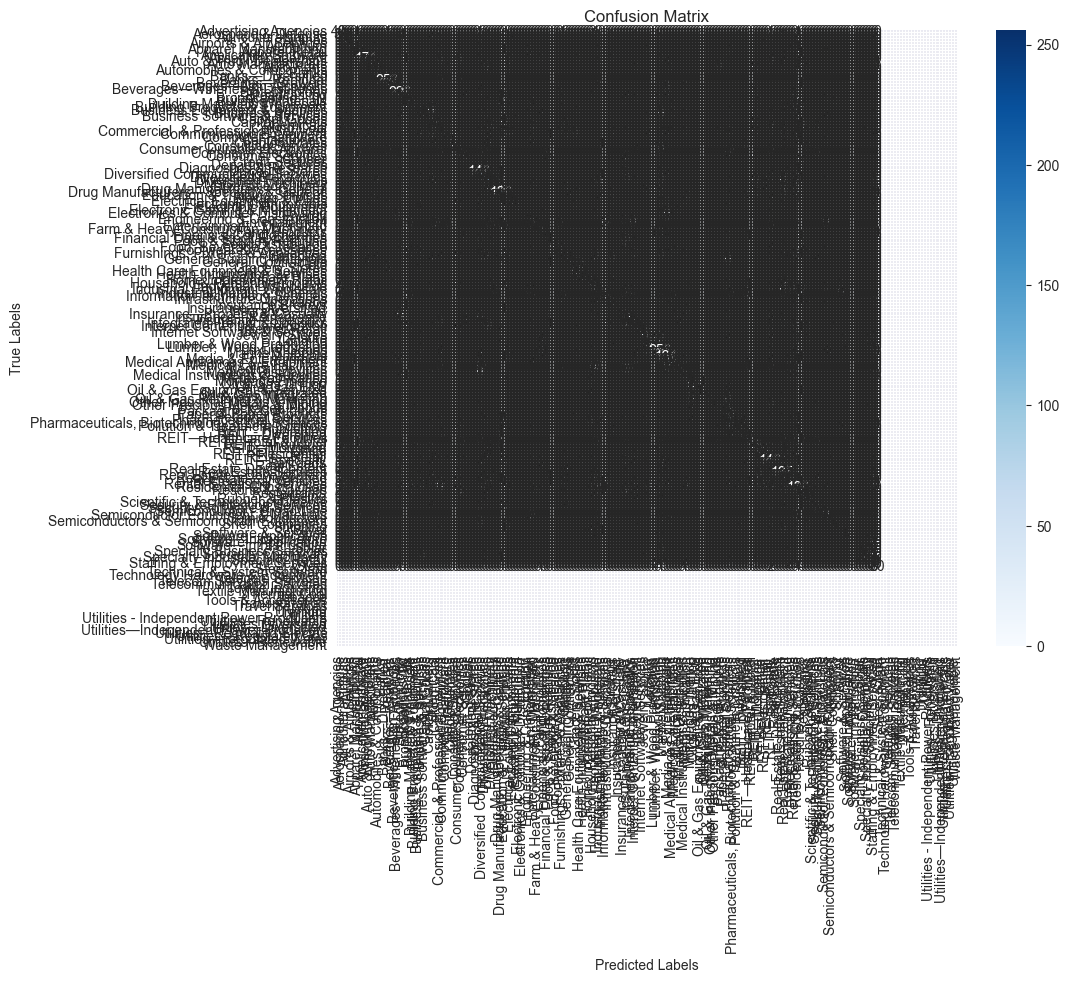

Accuracy: 0.6357
F1 Score: 0.6104


In [29]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

# Assuming y_test and y_pred are available
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")

In [30]:
from sklearn.metrics import classification_report, precision_recall_fscore_support
classes = label_encoder.classes_
unique_labels = np.unique(y_test)  # Unique labels in y_test

# Get the target names for the unique labels only
target_names = [classes[label] for label in unique_labels]

# Calculate precision, recall, f1-score
precision, recall, f1, _ = precision_recall_fscore_support(y_pred, y_test, labels=unique_labels, average=None)

# Generate the classification report for the actual labels in y_test
report = classification_report(y_pred, y_test, labels=unique_labels, target_names=target_names)
print(report)

                                                precision    recall  f1-score   support

                          Advertising Agencies       0.66      0.63      0.65        63
                           Aerospace & Defense       0.74      0.67      0.70        58
                           Agricultural Inputs       0.69      0.73      0.71        37
                                      Airlines       1.00      0.75      0.86        12
                       Airports & Air Services       0.80      1.00      0.89         8
                                      Aluminum       0.79      0.73      0.76        15
                         Apparel Manufacturing       0.76      0.65      0.70        85
                                Apparel Retail       0.42      0.56      0.48        25
                          Application Software       0.00      0.00      0.00         0
                              Asset Management       0.83      0.75      0.78       229
                      Auto & Tr

C:\Users\matth\anaconda3\envs\cs4262\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matth\anaconda3\envs\cs4262\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matth\anaconda3\envs\cs4262\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matth\anaconda3\envs\cs4262\lib\si